# **Covid data analysis**


Here we are using India covid dataset which is in form of csv file 

(data source : https://www.kaggle.com/sudalairajkumar/covid19-in-india)



**Load your Data**

Now first step is to load the data  which contains two files 

1. covid_19_india.csv - contains statewise and datewise confirmed, cured, deaths data 

2. StatewiseTestingDetails.csv - contains statewise and datewise testing data 

For this we need to use pandas library as follows 



In [ ]:
#import the library first

import pandas as pd

data = pd.read_csv('covid_19_india.csv')

tdata = pd.read_csv('StatewiseTestingDetails.csv')

#display the initial contents of both the datasets

**Review your Data** 

Now we will look at the contents of the data in details like number of columns, data types etc 

In [ ]:

data.head()   #this will display first 5 entries ( rows ) of your dataset

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
tdata.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [ ]:
data.info()  

'''
you can observe below that out of total 9291 entries, all columns contains some data that means all entries are present, 
but when you observe your actual dataset file, you will find '-' at many of the places
we will discuss about this in later part of this session 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       9291 non-null   int64 
 1   Date                      9291 non-null   object
 2   Time                      9291 non-null   object
 3   State/UnionTerritory      9291 non-null   object
 4   ConfirmedIndianNational   9291 non-null   object
 5   ConfirmedForeignNational  9291 non-null   object
 6   Cured                     9291 non-null   int64 
 7   Deaths                    9291 non-null   int64 
 8   Confirmed                 9291 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 653.4+ KB


"\nyou can observe below that out of total 9291 entries, all columns contains some data that means all entries are present, \nbut when you observe your actual dataset file, you will find '-' at many of the places\nwe will discuss about this in later part of this session \n"

In [ ]:
tdata.info()  #you can observe that out of total 8066 entries, there are less data entries 
              # in columns 'Negative' and 'Positive' as mentioned below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8066 entries, 0 to 8065
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          8066 non-null   object 
 1   State         8066 non-null   object 
 2   TotalSamples  8066 non-null   float64
 3   Negative      4294 non-null   object 
 4   Positive      4866 non-null   float64
dtypes: float64(2), object(3)
memory usage: 315.2+ KB


**Preprocess your data**

Now its time to preprocess your data where actual challenge is!! 



***Missing values- Part 1*** 

---



If your dataset contains 'blank' spaces, pandas will recognize it as missing values 

In our dataset which we have stored in'tdata', columns of names 'Negative' and 'Positive' contains blank/empty cells which pandas will recognize as follows 

In [ ]:
print(tdata['Negative'])
print(tdata['Negative'].isnull())

'''
as shown in result below, all blanks are represented as NaN values (missing values) and using .isnull() function , 
pandas specifies it as a null value that is wherever it is a NaN, its result is 'True'
'''

0       1210
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
8061     NaN
8062     NaN
8063     NaN
8064     NaN
8065     NaN
Name: Negative, Length: 8066, dtype: object
0       False
1        True
2        True
3        True
4        True
        ...  
8061     True
8062     True
8063     True
8064     True
8065     True
Name: Negative, Length: 8066, dtype: bool


"\nas shown in result below, all blanks are represented as NaN values (missing values) and using .isnull() function , \npandas specifies it as a null value that is wherever it is a NaN, its result is 'True'\n"

***Missing values- Part 2***

---



Now lets consider our other dataset which we have stored in 'data' 

In this dataset, columns with name 'ConfirmedIndianNational' and 'ConfirmedForeignNational' contains some data which is neither in 'empty' nor in 'n/a' form. It is mentioned in '-' (dash) form which is an irrelevant data 

In data science, we need to take care of such data 

Lets see how pandas behaves with such data 

In [ ]:
print(data['ConfirmedIndianNational'])
print(data['ConfirmedForeignNational'])

print(data['ConfirmedIndianNational'].isnull())
print(data['ConfirmedForeignNational'].isnull())

'''
See, here pandas didnt recognize '-' as missing data and kept it as it is, 
so .isnull() function value is also False for the entries containing '-'

'''

0       1
1       1
2       2
3       3
4       3
       ..
9286    -
9287    -
9288    -
9289    -
9290    -
Name: ConfirmedIndianNational, Length: 9291, dtype: object
0       0
1       0
2       0
3       0
4       0
       ..
9286    -
9287    -
9288    -
9289    -
9290    -
Name: ConfirmedForeignNational, Length: 9291, dtype: object
0       False
1       False
2       False
3       False
4       False
        ...  
9286    False
9287    False
9288    False
9289    False
9290    False
Name: ConfirmedIndianNational, Length: 9291, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
9286    False
9287    False
9288    False
9289    False
9290    False
Name: ConfirmedForeignNational, Length: 9291, dtype: bool


"\nSee, here pandas didnt recognize '-' as missing data and kept it as it is, \nso .isnull() function value is also False for the entries containing '-'\n\n"

***What is the solution on this ??***

To detect such different formats like '-', we have to put them in a list. after that when we import the data, pandas will recognize them

Lets try this !!

In [ ]:
mvalues = ["-"]
df = pd.read_csv("covid_19_india.csv", na_values = mvalues)   #'na_values' is a fixed parameter of pandas to identify missing values 

# now instead of using 'data' , now onwards we will use 'df' for this dataset - 'covid_19_india'

In [ ]:
print(df['ConfirmedIndianNational'])
print(df['ConfirmedForeignNational'])

print(df['ConfirmedIndianNational'].isnull())
print(df['ConfirmedForeignNational'].isnull())


#Great!! now pandas recognized '-' values as missing values as observed in below result



0       1.0
1       1.0
2       2.0
3       3.0
4       3.0
       ... 
9286    NaN
9287    NaN
9288    NaN
9289    NaN
9290    NaN
Name: ConfirmedIndianNational, Length: 9291, dtype: float64
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9286    NaN
9287    NaN
9288    NaN
9289    NaN
9290    NaN
Name: ConfirmedForeignNational, Length: 9291, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
9286     True
9287     True
9288     True
9289     True
9290     True
Name: ConfirmedIndianNational, Length: 9291, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
9286     True
9287     True
9288     True
9289     True
9290     True
Name: ConfirmedForeignNational, Length: 9291, dtype: bool


***Great!! finally all of the different formats are recognized as missing values!!***  

This is one of the critical aspects of data analysis in data science


***Summarizing Missing Values***

---



now next step is to summarize the missing values 

Lets say we want to observe the total number of missing values for each feature (column name)



In [ ]:
print (df.isnull().sum())   # it will give us the total number of missing values in each individual column 

Sno                            0
Date                           0
Time                           0
State/UnionTerritory           0
ConfirmedIndianNational     8845
ConfirmedForeignNational    8845
Cured                          0
Deaths                         0
Confirmed                      0
dtype: int64


In [ ]:
#lets print it for our previous dataset ( testing dataset also)
print (tdata.isnull().sum()) 

Date               0
State              0
TotalSamples       0
Negative        3772
Positive        3200
dtype: int64


In [ ]:
# suppose I want to check is there any missing value in entire dataset (even if there is one missing, it will give a True output)

print (tdata.isnull().values.any())     #since both datasets contains missing values, it will be 'True' for both datasets

print (df.isnull().values.any())

True
True


In [ ]:
# now I want to sum all the missing values ( how many total missing values in a dataset?)

print (tdata.isnull().sum().sum())      #this will give the sum of all missing values present in all columns together in entire dataset

print (df.isnull().sum().sum())

6972
17690


**Great!! We have summarized our missing values !!**

***Replacing Missing Values***

---

Now next step is to find the options for dealing with these missing values sometimes by deleting the rows or sometimes by replacing them by other values 

Again this is one more important step in data preprocessing 

There are many ways to replace the missing values, but which way you select is depending on your dataset, here we will discuss about the suitable way for our these datasets which are using here 






Drop columns in 'covid_19_india' that is , in 'df' which contains missing values using dropna() method 

dropna() method takes three arguments 

1. axis ( 0 for rows , 1 for columns ) 
2. inplace ( True makes all the changes in the existing table without returning a new table )
3. how (to control whether you want to remove the rows containing at least 1 NaN or all NaN (missing) values ) 

In [ ]:
df.dropna(axis=1,inplace=True, how='any')  # it will drop those columns where at least one value is NaN (missing) since we set how as 'any'
print(df.isnull())

'''
you can observe here that, there is no null or missing or NaN value present now 
since the result of .isnull() is False for all the values in the dataset as shown below 
also the number of columns reduced from 9 to 7 since it dropped those 2 columns 
'''


        Sno   Date   Time  State/UnionTerritory  Cured  Deaths  Confirmed
0     False  False  False                 False  False   False      False
1     False  False  False                 False  False   False      False
2     False  False  False                 False  False   False      False
3     False  False  False                 False  False   False      False
4     False  False  False                 False  False   False      False
...     ...    ...    ...                   ...    ...     ...        ...
9286  False  False  False                 False  False   False      False
9287  False  False  False                 False  False   False      False
9288  False  False  False                 False  False   False      False
9289  False  False  False                 False  False   False      False
9290  False  False  False                 False  False   False      False

[9291 rows x 7 columns]


'\nyou can observe here that, there is no null or missing or NaN value present now \nsince the result of .isnull() is False for all the values in the dataset as shown below \nalso the number of columns reduced from 9 to 7 since it dropped those 2 columns \n'

In [ ]:
#we can check that using .info() as follows 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Sno                   9291 non-null   int64 
 1   Date                  9291 non-null   object
 2   Time                  9291 non-null   object
 3   State/UnionTerritory  9291 non-null   object
 4   Cured                 9291 non-null   int64 
 5   Deaths                9291 non-null   int64 
 6   Confirmed             9291 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 508.2+ KB


***Filling Missing Values***

sometimes its not advisible to remove the rows containing missing values since they might contain valuable data in other columns. In this case, we need to fill these missing values by using certain values instead of directly removing those rows or columns 


There are many ways to fill the missing values, but we will discuss the approach which best suits for our dataset

Considering our second dataset, that is testing dataset (tdata), we will use the approach where we will fill missing values by some constant value ( here we will use constant value '0') since we dont want to find mean or median which may be dangerous for further analysis as its related to medical diagnosis 

To do this , we will use below code for those respective columns where missing values are present in testing ('tdata') dataset

In [ ]:
tdata['Negative'].fillna(0, inplace=True) #fill missing values by 0 value in 'Negative' column
tdata['Positive'].fillna(0, inplace=True) #fill missing values by 0 value in 'Positive' column

In [ ]:
#verify this by printing 
tdata.info()

# as you can see below that, all columns in this dataset are now become non-null 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8066 entries, 0 to 8065
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          8066 non-null   object 
 1   State         8066 non-null   object 
 2   TotalSamples  8066 non-null   float64
 3   Negative      8066 non-null   object 
 4   Positive      8066 non-null   float64
dtypes: float64(2), object(3)
memory usage: 315.2+ KB


**Great!! We have replaced/filled our missing values !!**

**Analysis on Preprocessed data** 

Lets do analysis on this preprocessed data now

Here we will find answers of some questions which we should able to answer as a data analyst/data scientist/researcher while working in data science domain

***Question 1***

How many states data is represented in dataset of testing (tdata) as well as general data (df)?

***solution***

In [ ]:
tdata['State'].nunique()   #here we have total 35 states data 

35

In [ ]:
df['State/UnionTerritory'].nunique()   #here we have total 45 state/unionterritory data 

45

***Question 2***

What is the total number of confirmed cases?

***solution***

In [ ]:
df['Confirmed'].sum() #here we are considering confirmed column from 'df' data 

853283429

***Question 3***

What are top five States with the most number of confirmed cases?

***solution***

In [ ]:
df1= df.sort_values(by ='Confirmed', ascending=False)   #here we are sorting the values in confirmed column 
df1.head(5)
# so result is only one state as top 5 total number of confirmed cases found in maharashtra only

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
9275,9276,09/12/20,8:00 AM,Maharashtra,1737080,47827,1859367
9240,9241,08/12/20,8:00 AM,Maharashtra,1730715,47774,1855341
9205,9206,07/12/20,8:00 AM,Maharashtra,1723370,47734,1852266
9170,9171,06/12/20,8:00 AM,Maharashtra,1715884,47694,1847509
9135,9136,05/12/20,8:00 AM,Maharashtra,1710050,47599,1842587


***Question 4***

What is the percentage of cured cases from confirmed cases?

***solution***

In [ ]:
print((df['Cured'].sum()/df['Confirmed'].sum())*100)  #as shown below, answer is 85.61 % 

85.61938755287841


***Question 5***

What is the percentage of positive from total samples collected in testing data?

***solution***

In [ ]:
print((tdata['Positive'].sum()/tdata['TotalSamples'].sum())*100)  #its good that the positive rate is below 2%

1.7329394812290562


**Data visualization**

we done with analysis, now its time to visualize the data to get some more insights from it 

There are various libraries available in python for data visualization like Matplotlib, seaborn , plotly etc 

We will cover some important plots using some of these libaries in this section which is as follows 

***using Seaborn library***

To use this library , we need to install and import it.

we will use the below command to install it 



In [ ]:
!pip install seaborn

In [ ]:
#To use seaborn, we need to import it now using below command

import seaborn as sns      #here we are using 'sns' as shortname instead of using seaborn each time

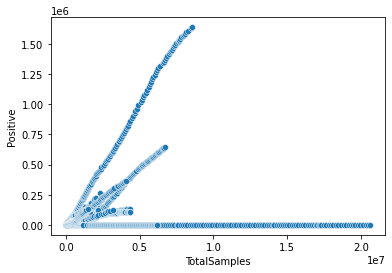

In [ ]:
#Suppose we want to visualize Total samples Vs Positive using scatter plot , how we can visualize it?
sns.scatterplot(x='TotalSamples',y='Positive',data=tdata)

#as shown in below output, we can see how rate of positive cases varies as number of Total samples vary 
#1e6 represents 1*(10**6) and 1e7 represents 1*(10**7)


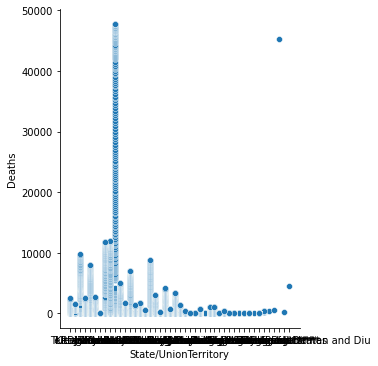

In [ ]:
#lets try one more plot 
#suppose we want to plot total number of statewise deaths , we can use relational plot of seaborn here 

sns.relplot(data=df, x="State/UnionTerritory", y="Deaths")

#because of space limitation in colab, names of state/Unionterritory not visible properly 
#figure shows peak number of deaths  in some states

In [ ]:
#lets filter out Delhi data 

df3= df[df["State/UnionTerritory"] == 'Delhi']
print(df3.head())   #this will show the initial entries for delhi, not all
print(df3.shape)   # so there are total 283 rows for the delhi in data set




    Sno      Date     Time State/UnionTerritory  Cured  Deaths  Confirmed
34   35  02/03/20  6:00 PM                Delhi      0       0          1
38   39  03/03/20  6:00 PM                Delhi      0       0          1
42   43  04/03/20  6:00 PM                Delhi      0       0          1
45   46  05/03/20  6:00 PM                Delhi      0       0          2
51   52  06/03/20  6:00 PM                Delhi      0       0          3
(283, 7)


           Date                        State  TotalSamples Negative  Positive
9    2020-05-23  Andaman and Nicobar Islands        7327.0        0      33.0
251  2020-05-23               Andhra Pradesh      292969.0   290255    2561.0
485  2020-05-23            Arunachal Pradesh        5206.0     4340       2.0
714  2020-05-23                        Assam       60405.0    54185     329.0
951  2020-05-23                        Bihar       61220.0        0    2344.0


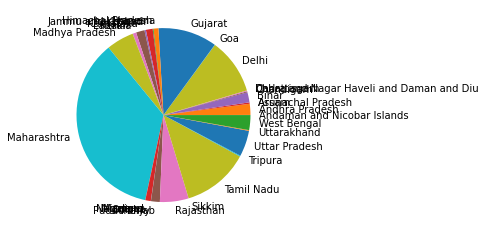

In [ ]:
#now suppose we want statewise analysis of Positive cases found on particular Date - lets say on 23/10/2020
#since one parameter is common ( number of positive cases) and we want to analysis this one only across various states
#pie chart will be suitable for such scenario
#we can do this using Matplotlib 

import matplotlib.pyplot as plt

df4= tdata[tdata["Date"] == '2020-05-23']
print(df4.head())
plt.pie(df4['Positive'],labels=df4['State'])
plt.show()

#from below result we can easily say that, for maharashtra state, there are more number of Positive cases found on 23/10/2020 than other states


Likewise we can do the data visualization using various approaches depending on what we want 

**Great!! Now we have visualized the data present in both the datasets which we have used.** 

Thank you

(Author - Mr. Rahul Bal)